In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
df = pd.read_csv('test_full_new_onlytext.csv')

<ipython-input-829-86e35d96c83b>:5: DtypeWarning: Columns (28,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('test_full_new_onlytext.csv')


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import math
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text_status,content,languages,image_url_status,image_url,video_thumbnail_status,video_thumbnail_url,video_url_status,...,uppercase_count,at_count,sentiment_score,subjectivity_score,word_count,image_size,aspect_ratio,brightness,saturation,entropy
0,0,0.0,Has text,Congratulations to Pauletha Butts of <mention>...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,...,0.0,0.0,0.0625,0.083333,26.0,"(680, 680)",1.000000,140.0,0.472951,7.835196
1,1,1.0,Has text,#NetZeroHomes: learn the best way to get to ze...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EnEIA1NXcAQIJw8?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,...,1.0,0.0,1.0000,0.300000,44.0,"(680, 383)",1.775457,124.0,0.097492,7.701251
2,2,2.0,Has text,"Tournaments come and go, but the pictures are ...",['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Dm0dpR7X0AEHCvO?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,...,0.0,0.0,1.0000,0.300000,17.0,"(680, 454)",1.497797,102.0,0.275644,7.847036
3,3,3.0,Has text,Monster Hunter Rise Concept Art: Great Izuchi....,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Embi-1aUYAEK4hb?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,...,0.0,0.0,0.4000,0.375000,20.0,"(680, 680)",1.000000,213.0,0.234387,4.550021
4,4,4.0,Has text,"With our #SalesDevelopmentProgram, you'll lear...",['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/DtM-hi2UwAAWH2i?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,...,0.0,0.0,0.5000,0.500000,23.0,"(680, 279)",2.437276,67.0,0.584368,6.978846


In [ ]:
min_count_threshold = 10  # Set your threshold for low counts
user_counts = df['username'].value_counts()
low_count_users = user_counts[user_counts < min_count_threshold].index
df['username_grouped'] = np.where(df['username'].isin(low_count_users), 'others', df['username'])

# Step 2: Perform ANOVA
# Get the unique groups
groups = df['username_grouped'].unique()

# Perform ANOVA
anova_results = []
for group in groups:
    subgroup = df[df['username_grouped'] == group]['likes']
    anova_results.append(subgroup)

# Print ANOVA results
f_statistic, p_value = f_oneway(*anova_results)
print(f'ANOVA F-statistic: {f_statistic:.4f}')
print(f'ANOVA p-value: {p_value:.4f}')

# If p-value is below a significance level (e.g., 0.05), you can reject the null hypothesis
if p_value < 0.05:
    print("There are significant differences in 'likes' based on 'username' groups.")
else:
    print("There are no significant differences in 'likes' based on 'username' groups.")


ANOVA F-statistic: nan
ANOVA p-value: nan
There are no significant differences in 'likes' based on 'username' groups.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'text_status', 'content', 'languages',
       'image_url_status', 'image_url', 'video_thumbnail_status',
       'video_thumbnail_url', 'video_url_status', 'video_url', 'video_bitrate',
       'video_duration', 'video_views', 'gif_thumbnail_status',
       'gif_thumbnail_url', 'gif_url_status', 'gif_url', 'gif_bitrate', 'year',
       'month', 'day_of_year', 'day_of_week', 'date', 'username',
       'inferred company', 'likes', 'media', 'is_url_active', 'media_type',
       'emoji_count', 'hastag_count', 'uppercase_count', 'at_count',
       'sentiment_score', 'subjectivity_score', 'word_count', 'image_size',
       'aspect_ratio', 'brightness', 'saturation', 'entropy',
       'username_grouped'],
      dtype='object')

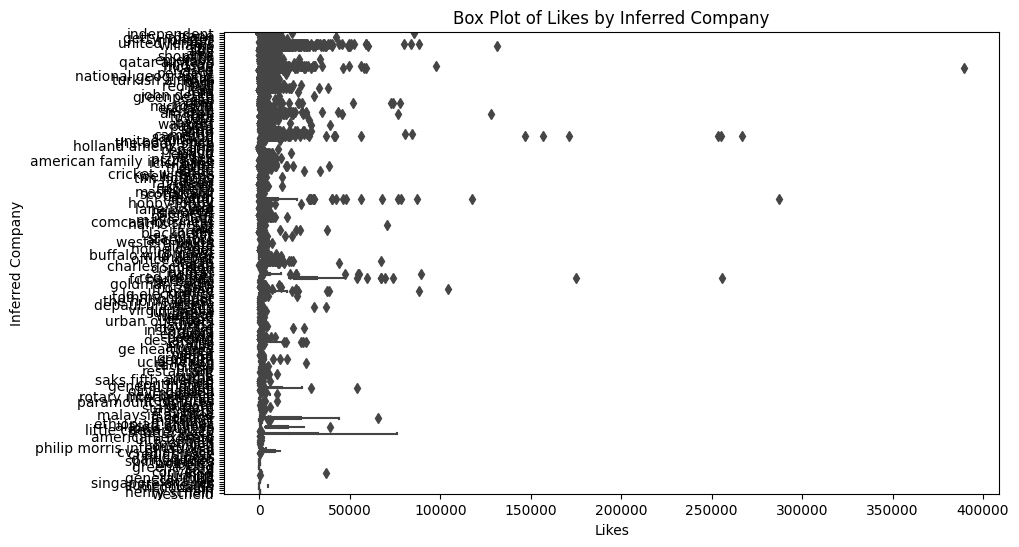

ANOVA F-statistic: 40.0662
ANOVA p-value: 0.0000
There are significant differences in 'likes' based on 'inferred company' groups.


In [ ]:
# Step 1: Group very less count companies as 'others'
min_count_threshold = 50  # Set your threshold for low counts
company_counts = df['inferred company'].value_counts()
low_count_companies = company_counts[company_counts < min_count_threshold].index
df['company_grouped'] = np.where(df['inferred company'].isin(low_count_companies), 'others', df['inferred company'])

# Step 2: Perform ANOVA
# Get the unique groups
groups = df['company_grouped'].unique()

# Perform ANOVA
anova_results = []
for group in groups:
    subgroup = df[df['company_grouped'] == group]['likes']
    anova_results.append(subgroup)

f_statistic, p_value = f_oneway(*[group['likes'] for name, group in df.groupby('inferred company')])

# Box plot for visualization with vertical axis
plt.figure(figsize=(10, 6))
sns.boxplot(x='likes', y='inferred company', data=df)
plt.title('Box Plot of Likes by Inferred Company')
plt.xlabel('Likes')
plt.ylabel('Inferred Company')
plt.show()

# Print ANOVA results
print(f'ANOVA F-statistic: {f_statistic:.4f}')
print(f'ANOVA p-value: {p_value:.4f}')

# If p-value is below a significance level (e.g., 0.05), you can reject the null hypothesis
if p_value < 0.05:
    print("There are significant differences in 'likes' based on 'inferred company' groups.")
else:
    print("There are no significant differences in 'likes' based on 'inferred company' groups.")

(array([ 3227., 11437.,  9040.,  8040.,  5639.,  5357.,  4355.,  2624.,
          749.,    88.]),
 array([ 2. ,  7.8, 13.6, 19.4, 25.2, 31. , 36.8, 42.6, 48.4, 54.2, 60. ]),
 <BarContainer object of 10 artists>)

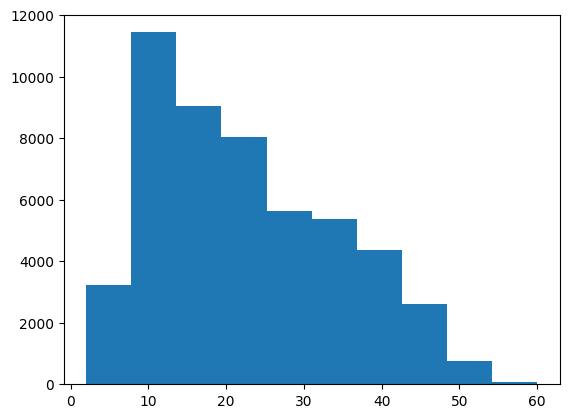

In [ ]:
plt.hist(df['word_count'])

In [ ]:
df['word_count'].mean()

22.50007912018356

In [ ]:
columns_to_drop = [
    'text_status',
    'content',
    'languages',
    'image_url_status',
    'image_url',
    'video_thumbnail_status',
    'video_thumbnail_url',
    'video_url_status',
    'video_url',
    'video_bitrate',
    'video_duration',
    'video_views',
    'gif_thumbnail_status',
    'gif_thumbnail_url',
    'gif_url_status',
    'gif_url',
    'gif_bitrate',
    'media',
    'is_url_active',
    'image_size',
       'aspect_ratio', 'brightness', 'saturation', 'entropy'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df.head()

,Unnamed: 0.1,Unnamed: 0,year,month,day_of_year,day_of_week,date,username,inferred company,likes,media_type,emoji_count,hastag_count,uppercase_count,at_count,sentiment_score,subjectivity_score,word_count,username_grouped,company_grouped
0,0,0.0,2018.0,October,292.0,Friday,2018-10-19 14:30:46,BGISD,independent,41.0,image,1.0,1.0,0.0,0.0,0.0625,0.083333,26.0,BGISD,independent
1,1,1.0,2020.0,November,323.0,Wednesday,2020-11-18 00:07:02,MitsubishiHVAC,trane,0.0,image,5.0,1.0,1.0,0.0,1.0000,0.300000,44.0,MitsubishiHVAC,trane
2,2,2.0,2018.0,September,254.0,Tuesday,2018-09-11 14:23:02,GettySport,getty images,120.0,image,4.0,0.0,0.0,0.0,1.0000,0.300000,17.0,GettySport,getty images
3,3,3.0,2020.0,November,315.0,Tuesday,2020-11-10 03:00:26,MHinfo_en,monster,567.0,image,1.0,1.0,0.0,0.0,0.4000,0.375000,20.0,MHinfo_en,monster
4,4,4.0,2018.0,November,333.0,Thursday,2018-11-29 22:11:56,UnitedRentals,united rentals,1.0,image,1.0,1.0,0.0,0.0,0.5000,0.500000,23.0,UnitedRentals,united rentals


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second

df = df.drop(columns=['date'])

In [ ]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,Unnamed: 0.1,year,month,day_of_year,day_of_week,username,inferred company,likes,media_type,emoji_count,...,uppercase_count,at_count,sentiment_score,subjectivity_score,word_count,username_grouped,company_grouped,hour,minute,second
0,0,2018.0,October,292.0,Friday,BGISD,independent,41.0,image,1.0,...,0.0,0.0,0.0625,0.083333,26.0,BGISD,independent,14.0,30.0,46.0
1,1,2020.0,November,323.0,Wednesday,MitsubishiHVAC,trane,0.0,image,5.0,...,1.0,0.0,1.0000,0.300000,44.0,MitsubishiHVAC,trane,0.0,7.0,2.0
2,2,2018.0,September,254.0,Tuesday,GettySport,getty images,120.0,image,4.0,...,0.0,0.0,1.0000,0.300000,17.0,GettySport,getty images,14.0,23.0,2.0
3,3,2020.0,November,315.0,Tuesday,MHinfo_en,monster,567.0,image,1.0,...,0.0,0.0,0.4000,0.375000,20.0,MHinfo_en,monster,3.0,0.0,26.0
4,4,2018.0,November,333.0,Thursday,UnitedRentals,united rentals,1.0,image,1.0,...,0.0,0.0,0.5000,0.500000,23.0,UnitedRentals,united rentals,22.0,11.0,56.0


In [ ]:
# df[['img_height', 'img_width']] = df['image_size'].str.extract(r'\((\d+),\s*(\d+)\)')

# # Convert the extracted values to numeric
# df[['img_height', 'img_width']] = df[['img_height', 'img_width']].apply(pd.to_numeric)

# df = df.drop(columns = ['image_size'])

In [ ]:
df.head()

,Unnamed: 0.1,year,month,day_of_year,day_of_week,username,inferred company,likes,media_type,emoji_count,...,uppercase_count,at_count,sentiment_score,subjectivity_score,word_count,username_grouped,company_grouped,hour,minute,second
0,0,2018.0,October,292.0,Friday,BGISD,independent,41.0,image,1.0,...,0.0,0.0,0.0625,0.083333,26.0,BGISD,independent,14.0,30.0,46.0
1,1,2020.0,November,323.0,Wednesday,MitsubishiHVAC,trane,0.0,image,5.0,...,1.0,0.0,1.0000,0.300000,44.0,MitsubishiHVAC,trane,0.0,7.0,2.0
2,2,2018.0,September,254.0,Tuesday,GettySport,getty images,120.0,image,4.0,...,0.0,0.0,1.0000,0.300000,17.0,GettySport,getty images,14.0,23.0,2.0
3,3,2020.0,November,315.0,Tuesday,MHinfo_en,monster,567.0,image,1.0,...,0.0,0.0,0.4000,0.375000,20.0,MHinfo_en,monster,3.0,0.0,26.0
4,4,2018.0,November,333.0,Thursday,UnitedRentals,united rentals,1.0,image,1.0,...,0.0,0.0,0.5000,0.500000,23.0,UnitedRentals,united rentals,22.0,11.0,56.0


In [ ]:
df = df.drop(columns = ['at_count'])

In [ ]:
df = df.drop(columns = ['username', 'inferred company'])

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'year', 'month', 'day_of_year', 'day_of_week', 'likes',
       'media_type', 'emoji_count', 'hastag_count', 'uppercase_count',
       'sentiment_score', 'subjectivity_score', 'word_count',
       'username_grouped', 'company_grouped', 'hour', 'minute', 'second'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0.1,year,month,day_of_year,day_of_week,likes,media_type,emoji_count,hastag_count,uppercase_count,sentiment_score,subjectivity_score,word_count,username_grouped,company_grouped,hour,minute,second
0,0,2018.0,October,292.0,Friday,41.0,image,1.0,1.0,0.0,0.0625,0.083333,26.0,BGISD,independent,14.0,30.0,46.0
1,1,2020.0,November,323.0,Wednesday,0.0,image,5.0,1.0,1.0,1.0000,0.300000,44.0,MitsubishiHVAC,trane,0.0,7.0,2.0
2,2,2018.0,September,254.0,Tuesday,120.0,image,4.0,0.0,0.0,1.0000,0.300000,17.0,GettySport,getty images,14.0,23.0,2.0
3,3,2020.0,November,315.0,Tuesday,567.0,image,1.0,1.0,0.0,0.4000,0.375000,20.0,MHinfo_en,monster,3.0,0.0,26.0
4,4,2018.0,November,333.0,Thursday,1.0,image,1.0,1.0,0.0,0.5000,0.500000,23.0,UnitedRentals,united rentals,22.0,11.0,56.0


In [ ]:
df = pd.get_dummies(df, columns=['month'], prefix='month', prefix_sep='_')
df = pd.get_dummies(df, columns=['day_of_week'], prefix='day', prefix_sep='_')
df = pd.get_dummies(df, columns=['media_type'], prefix='media', prefix_sep='_')
df = pd.get_dummies(df, columns=['username_grouped'], prefix='username', prefix_sep='_')
df = pd.get_dummies(df, columns=['company_grouped'], prefix='company', prefix_sep='_')


In [ ]:
df.head()

,Unnamed: 0.1,year,day_of_year,likes,emoji_count,hastag_count,uppercase_count,sentiment_score,subjectivity_score,word_count,...,company_united rentals,company_ups,company_urban outfitters,company_usaa,company_verizon,company_virgin media,company_walmart,company_williams,company_wwf,company_yahoo
0,0,2018.0,292.0,41.0,1.0,1.0,0.0,0.0625,0.083333,26.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020.0,323.0,0.0,5.0,1.0,1.0,1.0000,0.300000,44.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2018.0,254.0,120.0,4.0,0.0,0.0,1.0000,0.300000,17.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2020.0,315.0,567.0,1.0,1.0,0.0,0.4000,0.375000,20.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2018.0,333.0,1.0,1.0,1.0,0.0,0.5000,0.500000,23.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'year', 'day_of_year', 'likes', 'emoji_count',
       'hastag_count', 'uppercase_count', 'sentiment_score',
       'subjectivity_score', 'word_count',
       ...
       'company_united rentals', 'company_ups', 'company_urban outfitters',
       'company_usaa', 'company_verizon', 'company_virgin media',
       'company_walmart', 'company_williams', 'company_wwf', 'company_yahoo'],
      dtype='object', length=790)

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop('likes', axis=1).iloc[:,:].values
y = df['likes'].iloc[:].values

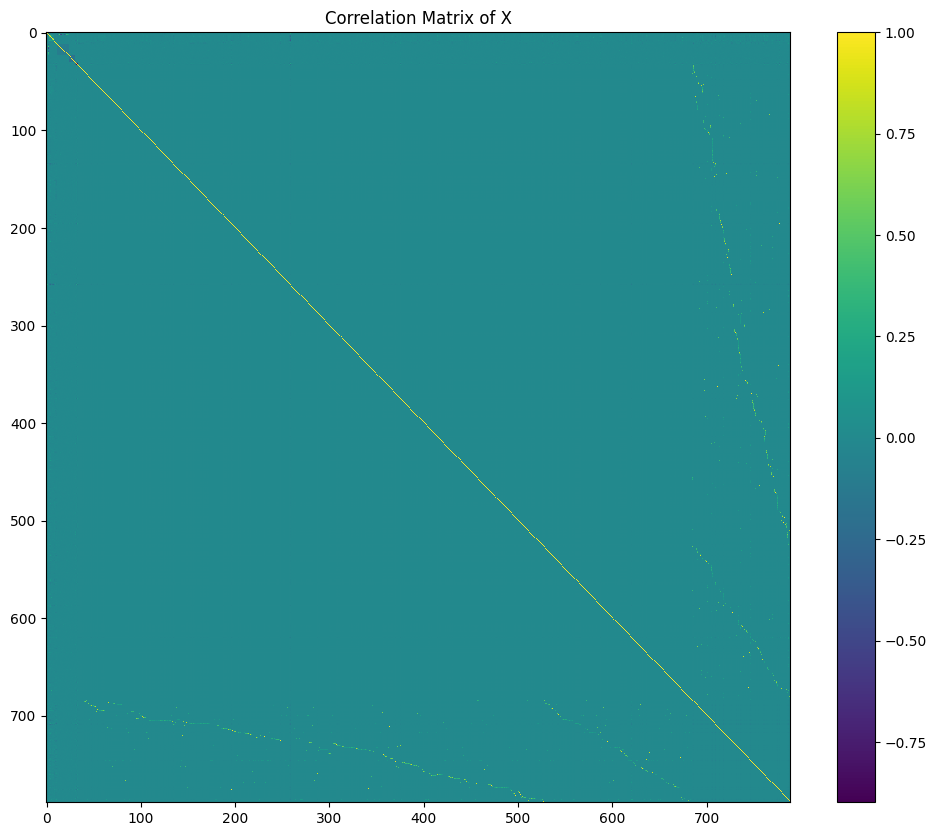

In [ ]:
correlation_matrix = np.corrcoef(X, rowvar=False)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix of X')
plt.show()

In [ ]:
# Assuming you have X_train and X_test
# X_train = np.array(...)  # Your training feature matrix
# X_test = np.array(...)   # Your testing feature matrix

# Create a StandardScaler instance
scaler = StandardScaler()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
quantile_transformer = QuantileTransformer(output_distribution='uniform')
y_train_scaled = quantile_transformer.fit_transform(y_train.reshape(-1, 1)).squeeze()
y_test_scaled = quantile_transformer.transform(y_test.reshape(-1, 1)).squeeze()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500,activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for regression
])

def quantile_loss(q, y, y_p):
        e = y-y_p
        return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))
quantile = 0

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

# Display the model summary
model.summary()
history = model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=128, validation_data=(X_test, y_test_scaled))

# Evaluate the model on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Evaluate the model on the test set
y_pred = quantile_transformer.inverse_transform(y_pred_scaled.reshape(-1, 1)).squeeze()

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root mean squared error: {math.sqrt(mse)}')
print(f'R-squared Score: {r2}')

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_218 (Dense)           (None, 500)               395000    
                                                                 
 dense_219 (Dense)           (None, 50)                25050     
                                                                 
 dense_220 (Dense)           (None, 1)                 51        
                                                                 
Total params: 420,101
Trainable params: 420,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
316/316 [==============================] - 8s 22ms/step - loss: 0.1005 - mse: 0.0199 - val_loss: 0.2623 - val_mse: 0.0952
Epoch 2/20
316/316 [==============================] - 7s 22ms/step - loss: 0.0827 - mse: 0.0148 - val_loss: 0.2594 - val_mse: 0.0927
Epoch 3/20
316/316 [=========================

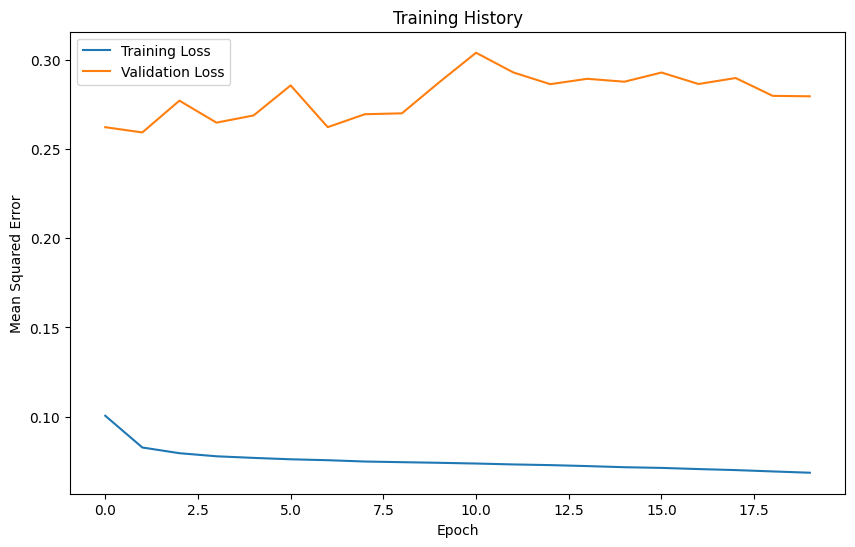

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
sorted_indices = np.argsort(y_test)

# Sort both t_test and y_pred based on y_pred values
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

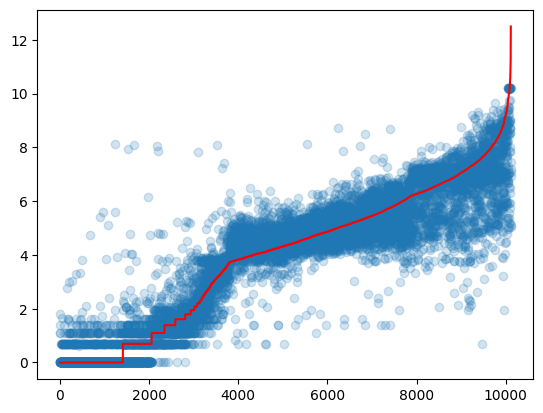

In [ ]:
plt.scatter(range(len(y_test_sorted)),np.log(1 + y_pred_sorted), alpha=0.2)
plt.plot(np.log(1 + y_test_sorted), color="red")

In [ ]:
y_train_pred = quantile_transformer.inverse_transform(model.predict(X_train_scaled).reshape((-1,1))).squeeze()


 380/1264 [========>.....................] - ETA: 3s

In [ ]:
sorted_indices = np.argsort(y_train)

# Sort both t_test and y_pred based on y_pred values
y_train_sorted = y_train[sorted_indices]
y_train_pred_sorted = y_train_pred[sorted_indices]

In [ ]:
plt.scatter(range(len(y_train_sorted)),np.log(1 + np.round(y_train_pred_sorted)), alpha=0.2)
plt.plot(np.log(1 + y_train_sorted), color="red")


In [ ]:
# Assuming you have y_train_sorted and y_train_pred_sorted arrays
# y_train_sorted = np.array(...)        # Your sorted true values
# y_train_pred_sorted = np.array(...)   # Your sorted predicted values

# Reshape the arrays to 2D if needed
y_train_sorted = y_train_sorted.reshape(-1, 1)
y_train_pred_sorted = y_train_pred_sorted.reshape(-1, 1)

# Choose the degree of the polynomial
degree = 1

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(y_train_pred_sorted)

# Create a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train_sorted)

# Predict the values using the polynomial model
y_train_pred_poly = poly_model.predict(X_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train_sorted, y_train_pred_poly))
print(f'Root Mean Squared Error (RMSE): {rmse}')


In [ ]:
np.sqrt(mean_squared_error(y_train, y_train_pred))